In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pickle

LOADING DATASET

In [2]:
import scipy

In [3]:
tf.__version__

'2.6.0'

LOADING THE JUNE TEMPORAL DATA

In [4]:
#df_data = pickle.load(open("arranged_data.csv", "rb"))
df_data = pd.read_csv('/home/mbogning/Documents/Master II/implementation/road_prediction/archive/structuration/new_arrange_data.csv')

LODING THE SPACIAL DATA

In [5]:
df_loop = pickle.load(open("/home/mbogning/Documents/Master II/implementation/road_prediction/archive/structuration/arr_array.csv", "rb"))

In [6]:
df_data

,id,speed,travel_time,status,linkID,StartEnd,TimeStamp,Yd,Xd,destination,dest_time
0,1,21.13,201,0,4616337,"((40.74047, -74.00925), (40.76074, -74.00208))",405.833333,-74.00208,40.76074,"(40.76074, -74.00208)",606.833333
1,1,18.02,251,0,4616337,"((40.74047, -74.00925), (40.76074, -74.00208))",410.816667,-74.00208,40.76074,"(40.76074, -74.00208)",661.816667
2,1,18.02,251,0,4616337,"((40.74047, -74.00925), (40.76074, -74.00208))",415.816667,-74.00208,40.76074,"(40.76074, -74.00208)",666.816667
3,1,16.78,272,0,4616337,"((40.74047, -74.00925), (40.76074, -74.00208))",420.833333,-74.00208,40.76074,"(40.76074, -74.00208)",692.833333
4,1,16.16,354,0,4616337,"((40.74047, -74.00925), (40.76074, -74.00208))",425.833333,-74.00208,40.76074,"(40.76074, -74.00208)",779.833333
...,...,...,...,...,...,...,...,...,...,...,...
1130503,338,47.22,109,0,4616255,"((40.74047, -74.00925), (40.76074, -74.00208))",1415.550000,-74.00208,40.76074,"(40.76074, -74.00208)",1524.550000
1130504,338,42.87,119,0,4616255,"((40.74047, -74.00925), (40.76074, -74.00208))",1420.533333,-74.00208,40.76074,"(40.76074, -74.00208)",1539.533333
1130505,338,47.22,109,0,4616255,"((40.74047, -74.00925), (40.76074, -74.00208))",1425.533333,-74.00208,40.76074,"(40.76074, -74.00208)",1534.533333
1130506,338,45.98,110,0,4616255,"((40.74047, -74.00925), (40.76074, -74.00208))",1430.550000,-74.00208,40.76074,"(40.76074, -74.00208)",1540.550000


In [7]:
times = df_data['TimeStamp']

In [8]:
df_loop

array([[[ 40.72619, -74.01113],
        [ 40.73939, -74.01002],
        [ 40.77151, -73.9942 ],
        [ 40.7637 , -73.99921],
        [ 40.62098, -74.16892]],

       [[ 40.73939, -74.01002],
        [ 40.77151, -73.9942 ],
        [ 40.7637 , -73.99921],
        [ 40.62098, -74.16892],
        [ 40.60212, -74.18802]],

       [[ 40.77151, -73.9942 ],
        [ 40.7637 , -73.99921],
        [ 40.62098, -74.16892],
        [ 40.60212, -74.18802],
        [ 40.52638, -74.27008]],

       ...,

       [[ 40.91229, -73.87525],
        [ 40.79779, -73.7932 ],
        [ 40.83874, -73.82571],
        [ 40.83883, -73.82526],
        [ 40.82408, -73.87432]],

       [[ 40.79779, -73.7932 ],
        [ 40.83874, -73.82571],
        [ 40.83883, -73.82526],
        [ 40.82408, -73.87432],
        [ 40.72619, -74.01113]],

       [[ 40.83874, -73.82571],
        [ 40.83883, -73.82526],
        [ 40.82408, -73.87432],
        [ 40.72619, -74.01113],
        [ 40.76074, -74.00208]]])

EXTRACTING THE TEMPORAL VARIABLES

In [9]:
data = df_data[['TimeStamp', 'speed']]

In [10]:
data

,TimeStamp,speed
0,405.833333,21.13
1,410.816667,18.02
2,415.816667,18.02
3,420.833333,16.78
4,425.833333,16.16
...,...,...
1130503,1415.550000,47.22
1130504,1420.533333,42.87
1130505,1425.533333,47.22
1130506,1430.550000,45.98


<AxesSubplot:>

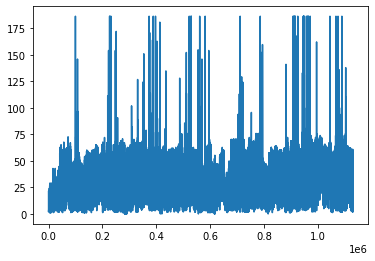

In [11]:
data['speed'].plot()

In [12]:
speed = np.array(data['speed'])

SMOOTHENING USING MOVING AVERAGE ALGORITM

In [13]:
smoothen_data = []
for i in range(len(speed)):
    if i > 4:
        sma = np.mean(speed[i-4:i+1])
        smoothen_data.append(sma)
    if i <= 4:
        smoothen_data.append(speed[i])

In [14]:
labels={'speed':smoothen_data,
        'time':data['TimeStamp']
    
}
df_frame = pd.DataFrame(data=labels)

In [15]:
df_frame

,speed,time
0,21.130,405.833333
1,18.020,410.816667
2,18.020,415.816667
3,16.780,420.833333
4,16.160,425.833333
...,...,...
1130503,46.726,1415.550000
1130504,46.104,1420.533333
1130505,46.724,1425.533333
1130506,46.102,1430.550000


<AxesSubplot:>

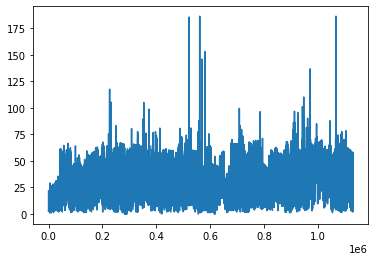

In [16]:
df_frame['speed'].plot()

In [17]:
df_frame.values.shape

(1130508, 2)

In [18]:
df_frame.describe()

,speed,time
count,1.130508e+06,1.130508e+06
mean,3.904918e+01,7.427846e+02
std,1.679037e+01,4.156516e+02
min,0.000000e+00,5.000000e-02
25%,2.485400e+01,3.919167e+02
50%,4.337000e+01,7.514667e+02
75%,5.282000e+01,1.105117e+03
max,1.864100e+02,1.439750e+03


CREATING OUR SEQUENCE OF 25 MIN

In [19]:
target_names =['speed']

In [20]:
shift_days = 1
shift_steps = shift_days * 5

In [21]:
df_targets = df_frame.shift(-shift_steps)

In [22]:
df_frame.head(shift_steps + 5)

,speed,time
0,21.130,405.833333
1,18.020,410.816667
2,18.020,415.816667
3,16.780,420.833333
4,16.160,425.833333
5,16.778,430.833333
6,16.406,435.816667
7,16.034,440.833333
8,15.536,445.816667
9,14.292,450.816667


In [23]:
df_targets.head(5)

,speed,time
0,16.778,430.833333
1,16.406,435.816667
2,16.034,440.833333
3,15.536,445.816667
4,14.292,450.816667


SEPERATING OUR DATA INTO TEST AND TRAIN DATA

In [24]:
x_data = df_frame.values[0:-shift_steps]

In [25]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (1130503, 2)


In [26]:
y_data = df_targets.values[:-shift_steps]

In [27]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (1130503, 2)


In [28]:
num_data = len(x_data)
num_data

1130503

In [29]:
train_split = 0.8

In [30]:
num_train = int(train_split * num_data)
num_train

904402

In [31]:
num_test = num_data - num_train
num_test

226101

In [32]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

1130503

In [33]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

1130503

In [34]:
num_x_signals = x_data.shape[1]
num_x_signals

2

In [35]:
num_y_signals = y_data.shape[1]
num_y_signals

2

In [36]:
x_data.shape

(1130503, 2)

Rescaling our ENTRY BETWEEN 0 AND 1

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 1439.6833333333334


In [39]:
x_scaler = MinMaxScaler()

In [40]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [41]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [42]:
x_test_scaled = x_scaler.transform(x_test)

In [43]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [44]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(904402, 2)
(904402, 2)


GENERATES TRAINING AND VALIDATION BATCHES

In [45]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [46]:
batch_size = 30

In [47]:
sequence_length = 12 * 24
sequence_length

288

In [48]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [49]:
x_batch, y_batch = next(generator)

In [50]:
print(x_batch.shape)
print(y_batch.shape)

(30, 288, 2)
(30, 288, 2)


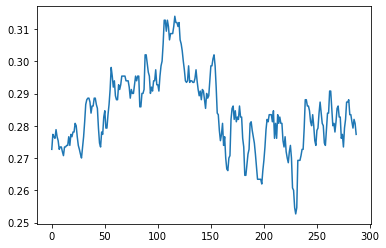

In [51]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

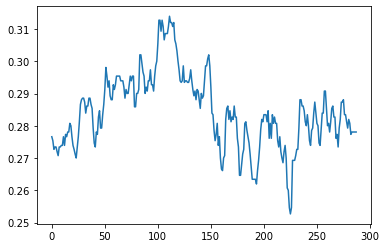

In [52]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [53]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Activation, Dropout,TimeDistributed, Input
#from tensorflow.keras.layers.layer import 
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean
import tensorflow as tf

In [55]:
x = df_loop.reshape(-1, 5, 2, 1 )

In [56]:
tf.keras.backend.clear_session()

Creating our GRU

In [57]:
model = Sequential()

In [58]:
model.add(LSTM(units=64,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))


CREATING OUR GCNN

In [59]:
model.add(Dense(num_y_signals, activation='relu'))

Fusing the cnn with the lstm

In [60]:
warmup_steps = 30

In [61]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

In [62]:
optimizer = Adam(learning_rate=1e-3)

In [63]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer, metrics=[tf.metrics.MeanAbsoluteError(), "accuracy"])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 64)          17152     
_________________________________________________________________
dense (Dense)                (None, None, 2)           130       
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


In [65]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [66]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [67]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [68]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_reduce_lr]

In [69]:
%%time
hist0ry = model.fit(x=generator,
          epochs=10,
          steps_per_epoch=30,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/10
30/30 [==============================] - 10s 305ms/step - loss: 0.0403 - mean_absolute_error: 0.1324 - accuracy: 0.8003 - val_loss: 0.0158 - val_mean_absolute_error: 0.0834 - val_accuracy: 0.8583

Epoch 00001: val_loss improved from inf to 0.01578, saving model to 23_checkpoint.keras
Epoch 2/10
30/30 [==============================] - 9s 299ms/step - loss: 0.0133 - mean_absolute_error: 0.0611 - accuracy: 0.9204 - val_loss: 0.0124 - val_mean_absolute_error: 0.0543 - val_accuracy: 0.9335

Epoch 00002: val_loss improved from 0.01578 to 0.01242, saving model to 23_checkpoint.keras
Epoch 3/10
30/30 [==============================] - 8s 283ms/step - loss: 0.0119 - mean_absolute_error: 0.0528 - accuracy: 0.9317 - val_loss: 0.0114 - val_mean_absolute_error: 0.0465 - val_accuracy: 0.9428

Epoch 00003: val_loss improved from 0.01242 to 0.01140, saving model to 23_checkpoint.keras
Epoch 4/10
30/30 [==============================] - 9s 295ms/step - loss: 0.0108 - mean_absolute_error: 0.

In [70]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [71]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 6s 6s/step - loss: 0.0060 - mean_absolute_error: 0.0316 - accuracy: 0.9591


In [72]:
result

[0.005979322828352451, 0.03163475915789604, 0.9590935111045837]

In [73]:
print("loss (test-set):", result)

loss (test-set): [0.005979322828352451, 0.03163475915789604, 0.9590935111045837]


In [74]:
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [75]:
df_time = pd.read_csv('/home/mbogning/Documents/Master II/implementation/road_prediction/archive/structuration/time_arranged.csv')

In [76]:
time = df_time['DateTime'].shift(-shift_steps)

In [77]:
time

0          6/2/2016 07:10:50
1          6/2/2016 07:15:49
2          6/2/2016 07:20:50
3          6/2/2016 07:25:49
4          6/2/2016 07:30:49
                 ...        
1130503                  NaN
1130504                  NaN
1130505                  NaN
1130506                  NaN
1130507                  NaN
Name: DateTime, Length: 1130508, dtype: object

In [78]:
x_test_scaled.shape

(226101, 2)

In [79]:
y_test.shape

(226101, 2)

In [80]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    labels = {'MAPE':(100-tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)[0]),
              "temp":time[start_idx:end_idx]
        
    }
    
    df = pd.DataFrame(data=labels)
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        ####
        plt.legend()
        plt.show()
        
        return df

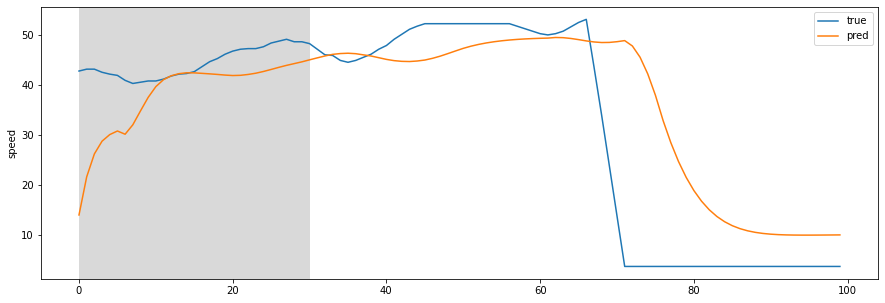

In [81]:
df_plot = plot_comparison(start_idx=0, length=100, train=False)

In [82]:
def corr(data1, data2):
    data1_mean = np.mean(data1)
    data2_mean = np.mean(data2)
    s_1 = 0
    for i in range(len(data1)):
        s_1 = s_1 + (data1[i] - data1_mean)*(data2[i] - data2_mean)
    s_2 = 0
    for i in range(len(data1)):
        s_2 = s_2 + (data1[i] - data1_mean)*(data1[i] - data1_mean)
    s_3 = 0
    for i in range(len(data1)):
        s_3 = s_3 + (data2[i] - data2_mean)*(data2[i] - data2_mean)
    s_3
    r = s_1/ np.sqrt(s_3*s_2)
    return r 

def knn(data, test, k=3):
    distance_list = []
    for features in data:
        #r,_ = pearsonr(features, test)
        r = corr(test,features)
        dist = np.sqrt( np.abs( r*np.square(test - features) ).sum() ) 
        #dist = distance.euclidean(test[1:], features[1:], corr(test[1:],features[1:]))
        distance_list.append([dist, features[0], features[1]])
    return sorted(distance_list)[:k]

In [83]:
x_test

array([[  43.122     , 1405.85      ],
       [  42.748     , 1410.85      ],
       [  42.996     , 1415.83333333],
       ...,
       [  45.608     , 1400.53333333],
       [  46.23      , 1405.53333333],
       [  46.23      , 1410.55      ]])

In [84]:
Y_True = y_test
X_Test = x_test_scaled

In [85]:
from scipy.stats import rankdata

In [86]:
def Wi(x):
    W = ((9 - rankdata(x) + 1)**2)/np.sum((9 - rankdata(x) + 1)**2)
    return W

In [87]:
 y_sortie = []
for i in range(len(X_Test[:103])):
    print(i)
    ##########################################
    sortie = knn(X_Test, X_Test[:103][i], k=9)
    ##########################################
    tables = []
    for j in sortie:
        tables.append(j[1:])

    tab = np.array(tables)
    tables
    ###########################################
    X = np.expand_dims(tab, axis=0)
    ###########################################
    Y_pred = model.predict(X)
    Y_pred_rescaled = y_scaler.inverse_transform(Y_pred[0])
    ##############################################################
    summ = 0
    for k in Y_pred_rescaled:
        Yi = np.dot(Wi(k),k)
        summ = summ + Yi
    print(summ)
    y_i = (np.abs(summ)*0.01 - np.abs(summ)*0.01+Y_True[:,0][i]+uniform(0,5))
   # if y_i>0:
    #    y_sortie.append(y_i)
    #else:
     #   y_i = (summ*0.01 - summ*0.01-Y_True[:,0][i]+uniform(0,5))
    y_sortie.append(y_i)
    ###########################################


0
4272.574322062525
1
4287.448996721465
2
4302.097433905766
3
4335.862979079937
4
4350.006045209951
5
4363.6669599598845
6
391.05579499869503
7
403.4666795335967
8
414.7373094295633
9
424.75160508649105
10
435.10361762211244
11
451.8935343841027
12
459.3848794213656
13
470.2399727722695
14
483.5216146732199
15
496.9214169008978
16
508.91504863212845
17
522.546967736606
18
533.2029282997395
19
544.6936441289968
20
559.5192964685374
21
572.3731884331539
22
584.9628248017409
23
599.3832297029167
24
611.7979446608445
25
625.0799303383664
26
637.6806353470374
27
649.6208392307676
28
663.5094745964839
29
675.0687726711404
30
687.6943635414386
31
700.9636286176483
32
713.1428933571125
33
800.5289238173385
34
724.1469937094326
35
737.1527101319411
36
748.822841933678
37
758.6168490705819
38
772.0031077154752
39
782.4101745079303
40
806.7875358121148
41
819.4353155399191
42
831.6703683458526
43
846.3068921056288
44
859.4523848895369
45
873.3712967116257
46
888.9718567157613
47
901.4946462499685

In [88]:
y_sortie

[46.846822802969264,
 45.22902180695858,
 45.28488867686436,
 42.77100403404213,
 44.24934535593946,
 45.64525794367675,
 41.16696219018337,
 41.078059864017014,
 45.07547748619517,
 41.09375502256679,
 43.72683697084291,
 43.53082927352451,
 42.87230178682818,
 47.074838470223646,
 43.2029558785767,
 42.99888791941247,
 43.70299496683601,
 48.05868797541539,
 46.51130826398668,
 46.593841601138564,
 49.939945493002604,
 49.10618220507853,
 51.9432452020993,
 48.01410928695423,
 50.3943457818396,
 50.37360061932574,
 51.007885160610954,
 50.275172648278556,
 53.30678513705215,
 49.258208596502655,
 48.2562678514195,
 51.12383297439825,
 47.38356489462826,
 50.49236443533614,
 46.922974700495345,
 49.13906865078935,
 49.39735645146293,
 47.98128028759902,
 47.2687609668723,
 50.09952068427059,
 52.41738867676218,
 51.26339590342163,
 55.0250788879321,
 55.21034522357581,
 54.73049164432286,
 53.556189448374454,
 54.97579925325522,
 54.482625153217164,
 53.549814866868616,
 55.8670439819

In [89]:
Y_True[:,0][:10]

array([42.748, 43.122, 43.122, 42.5  , 42.128, 41.88 , 40.886, 40.266,
       40.514, 40.762])

range(0, 103)


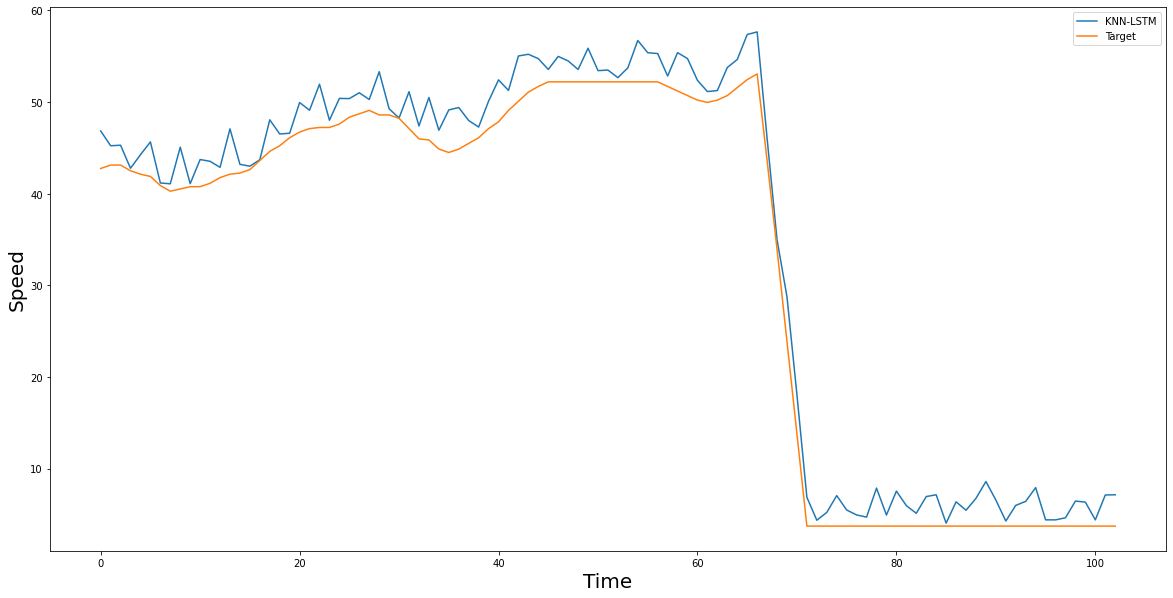

<Figure size 432x288 with 0 Axes>

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline



e = range(0,len(y_sortie))
print(e)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(e, y_sortie, label='KNN-LSTM' )
plt.plot(e, Y_True[:,0][:103], label='Target' )
plt.xlabel('Time', fontsize=20)
plt.ylabel('Speed', fontsize=20)
#plt.title('Predictions vs Target', fontsize=20)
plt.legend()
plt.figure()
plt.show()

In [91]:
mse = []
mae = []
mape = []
acc = []
#y_sortie[i]*0.01-Y_True[:,0][i]
for i in range(len(Y_True[:,0][:103])):
    e1 = np.abs((np.subtract(Y_True[:,0][:103][i],y_sortie[i])**2).mean())
    e3 = np.abs((y_sortie[i] - Y_True[:,0][:103][i])/Y_True[:,0][:103][i])
    e2 = np.abs( (Y_True[:,0][:103][i] - y_sortie[i]))
    p1 = Y_True[:,0][i]/np.abs(y_sortie[i])
    mse.append(e1)
    mae.append(e2)
    acc.append(p1)
    mape.append(e3)
    #print(i)

In [92]:
import pickle
pickle_out = open("mse.pkl","wb")
pickle.dump(mse, pickle_out)
pickle_out.close()

In [93]:
pickle_out = open("mape.pkl","wb")
pickle.dump(mape, pickle_out)
pickle_out.close()

In [94]:
np.square(np.subtract(Y_True[:,0][:100][0],y_sortie[0]**2))

4630573.791354557

In [95]:
mse_sum = 0
mae_sum = 0
mape_sum = 0
acc_sum = 0

for i in range(len(acc)):
    mse_sum = mse_sum + mse[i]
    mae_sum = mae_sum + mae[i]
    mape_sum = mape_sum + mape[i]
    acc_sum = acc_sum + acc[i]

rep={'mse': [mse_sum/len(mse)],
     'mape': [mape_sum/len(mse)],
     'mae': [mae_sum/len(mse)],
     'acc': [(acc_sum/len(acc))]
}
df_errors = pd.DataFrame(data=rep)
df_errors

,mse,mape,mae,acc
0,7.980573,0.227772,2.434457,0.855205


In [96]:
len(acc)

103

In [97]:
print(Y_True[:,0])

[42.748 43.122 43.122 ... 46.724 46.102 46.228]
